In [131]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import Grouper
from matplotlib import pyplot
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# **Reading the necessary files and exploring the data**

In [132]:
series= read_csv('final276.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
NC = series[series['location']=='North Carolina Mecklenburg']


In [133]:
finalindicator = read_csv('finalindicator.csv', header=0,index_col=0)
indicator= finalindicator[finalindicator['finalloc']=='North Carolina Mecklenburg'] 

In [134]:
print(NC.head())
print(" \nCount total NaN at each column in a DataFrame : \n\n", NC.isnull().sum()) 
NC.columns = NC.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '') # rename colums 
print(NC.columns)


print(NC["date.local"].describe())

NC["date.local"] = pd.to_datetime(NC["date.local"])
print(NC["date.local"].describe())


     Date.Local                    location  ...  new_deaths      pm2.5
40   2020-01-22  North Carolina Mecklenburg  ...         NaN   7.704394
95   2020-01-23  North Carolina Mecklenburg  ...         0.0  10.650000
150  2020-01-24  North Carolina Mecklenburg  ...         0.0   7.180556
207  2020-01-25  North Carolina Mecklenburg  ...         0.0   4.020833
263  2020-01-26  North Carolina Mecklenburg  ...         0.0   8.058333

[5 rows x 10 columns]
 
Count total NaN at each column in a DataFrame : 

 Date.Local           0
location             0
wind                 0
temp                 0
press                0
cumulative_cases     0
cumulative_deaths    0
new_cases            1
new_deaths           1
pm2.5                0
dtype: int64
Index(['date.local', 'location', 'wind', 'temp', 'press', 'cumulative_cases',
       'cumulative_deaths', 'new_cases', 'new_deaths', 'pm2.5'],
      dtype='object')
count            100
unique           100
top       2020-04-26
freq               1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  # Remove the CWD from sys.path while we load stuff.


# **Replacing NA's and transforming the dataframe into a series **

In [135]:
NC = NC.fillna(method="backfill")

In [ ]:
NC.shape
NC.iloc[:,2:11]

In [ ]:
NC

In [136]:
print(" \nCount total NaN at each column in a DataFrame : \n\n", NC.isnull().sum()) 
# CHECK NAS
NC.rename(columns={"date.local": "date"}, inplace = True)


 
Count total NaN at each column in a DataFrame : 

 date.local           0
location             0
wind                 0
temp                 0
press                0
cumulative_cases     0
cumulative_deaths    0
new_cases            0
new_deaths           0
pm2.5                0
dtype: int64


In [107]:
print(NC.describe())



             wind        temp        press  ...   new_cases  new_deaths       pm2.5
count  100.000000  100.000000   100.000000  ...  100.000000  100.000000  100.000000
mean    94.646584   54.521516   990.194185  ...   16.270000    0.470000    6.922991
std     33.789284   10.229392     6.923046  ...   23.004108    1.274894    2.851099
min     19.417708   33.854166   973.043478  ...   -1.000000    0.000000    0.821086
25%     76.516667   46.610322   985.697917  ...    0.000000    0.000000    5.005556
50%    104.970312   54.468750   989.750000  ...    0.000000    0.000000    6.516528
75%    116.472656   61.864130   995.250000  ...   30.000000    0.000000    8.763264
max    157.923958   75.270833  1006.500000  ...   89.000000    7.000000   14.936111

[8 rows x 8 columns]


In [137]:
NC = NC.set_index("date")
NC['year'] = NC.index.year
NC['month'] = NC.index.month
NC['weekday'] = NC.index.dayofweek
NC['dayofyear'] = NC.index.dayofyear
NC['dayofmonth'] = NC.index.daysinmonth  

In [ ]:
NC

# **Adding the PM2_5 indicator to the sereis **

In [138]:
NC["PM2.5_indicator"] = NC["pm2.5"]
NC["PM2.5_indicator"][0] = NC["PM2.5_indicator"][0] + indicator["ind"] 
for i in (1,len(NC["PM2.5_indicator"])-1):
  NC["PM2.5_indicator"][i] = (NC["PM2.5_indicator"][i-1] + NC["PM2.5_indicator"][i])

NC["PM2.5_indicator"]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


date
2020-01-22    16.388099
2020-01-23    27.038099
2020-01-24     7.180556
2020-01-25     4.020833
2020-01-26     8.058333
                ...    
2020-04-26     5.656944
2020-04-27     3.058333
2020-04-28     8.725000
2020-04-29     5.743333
2020-04-30     8.604445
Name: PM2.5_indicator, Length: 100, dtype: float64

# **Plotting the Series over time **

Int64Index([1, 2, 3, 4], dtype='int64', name='month')


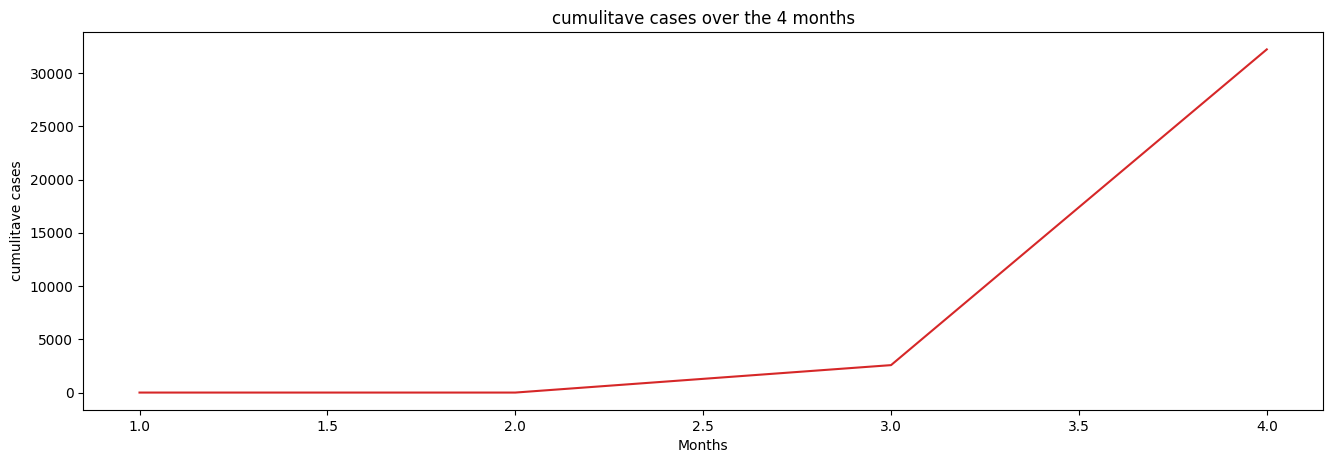

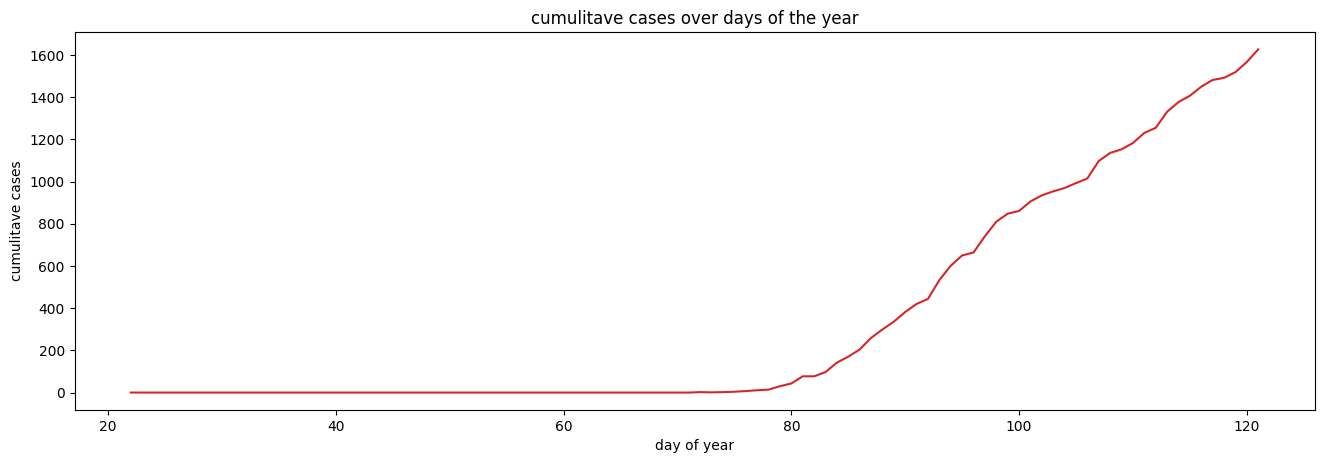

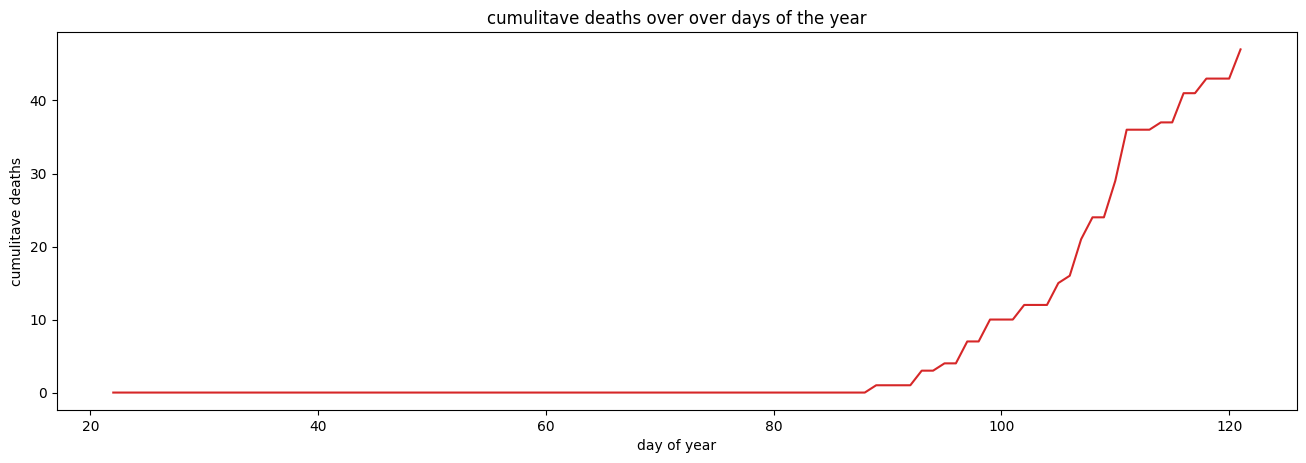

In [111]:
# Monthly Cumulative cases 
result = DataFrame(NC.groupby(NC.month)['cumulative_cases'].sum())
print(result.index)

def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(result, x=result.index, y= result.cumulative_cases, title="cumulitave cases over the 4 months", xlabel = "Months", ylabel = "cumulitave cases")  
## outliers loll

result2 = DataFrame(NC.groupby(NC.dayofyear)['cumulative_cases'].sum())
 
plot_df(result2, x=result2.index, y= result2.cumulative_cases, title="cumulitave cases over days of the year", xlabel = "day of year", ylabel = "cumulitave cases")  

# monthly deaths cases

result3 = DataFrame(NC.groupby(NC.dayofyear)['cumulative_deaths'].sum())
 
plot_df(result3, x=result3.index, y= result3.cumulative_deaths,title="cumulitave deaths over over days of the year", xlabel = "day of year", ylabel = "cumulitave deaths")  

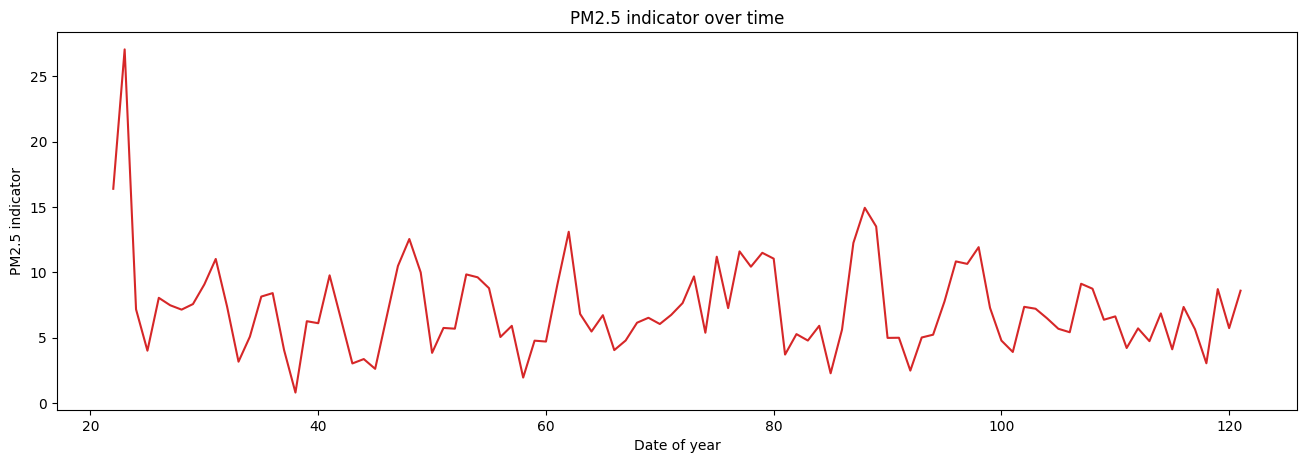

In [112]:
result4 = DataFrame(NC.groupby(NC.dayofyear)['PM2.5_indicator'].sum())
 
plot_df(result4, x=result4.index, y= result4['PM2.5_indicator'], title='PM2.5 indicator over time', xlabel = "Date of year", ylabel = "PM2.5 indicator")

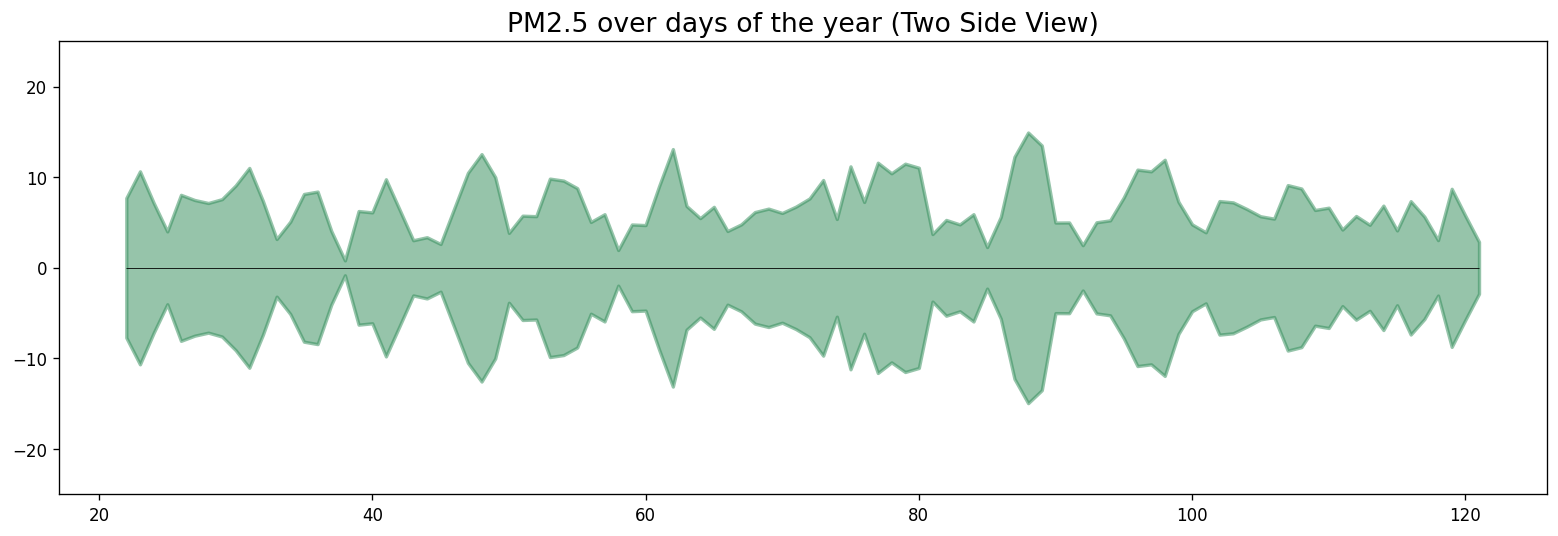

In [113]:
x = NC['dayofyear'].values
y1 = NC['pm2.5'].values
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-25, 25)
plt.title('PM2.5 over days of the year (Two Side View)', fontsize=16)
plt.hlines(y=0, xmin=np.min(NC.dayofyear), xmax=np.max(NC.dayofyear), linewidth=.5)
plt.show()

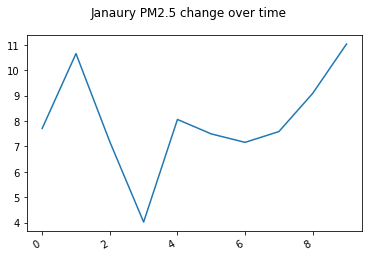

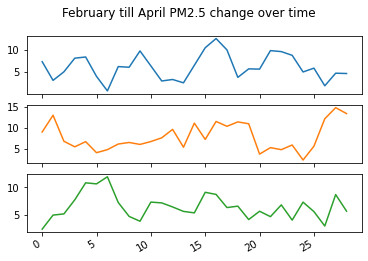

In [114]:
from pandas import Grouper
groups = [1]
months = DataFrame()
for group in groups:
  months[group] = pd.Series(NC[NC["month" ] == int(group)]["pm2.5"].values.tolist())

months.plot(subplots=True, legend=False, title="Janaury PM2.5 change over time")
pyplot.show()

groups = [2,3,4]
months = DataFrame()
for group in groups:
  months[group] = pd.Series(NC[NC["month" ] == int(group)]["pm2.5"].values.tolist())

months.plot(subplots=True, legend=False, title="February till April PM2.5 change over time")
pyplot.show()



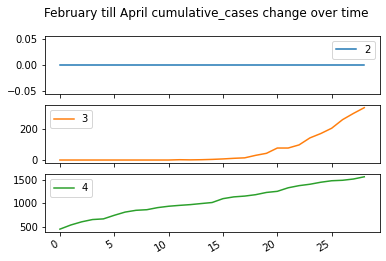

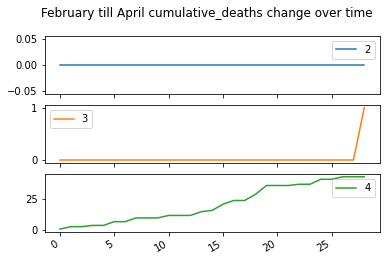

In [115]:
from pandas import Grouper

groups = [2,3,4]
months = DataFrame()
for group in groups:
  months[group] = pd.Series(NC[NC["month" ] == int(group)]["cumulative_cases"].values.tolist())

months.plot(subplots=True, title="February till April cumulative_cases change over time")
pyplot.show()
 
groups = [2,3,4]
months = DataFrame()
for group in groups:
  months[group] = pd.Series(NC[NC["month" ] == int(group)]["cumulative_deaths"].values.tolist())

months.plot(subplots=True, title="February till April cumulative_deaths change over time")
pyplot.show()
 


# **KNN clustering to determine patterns between different variables**

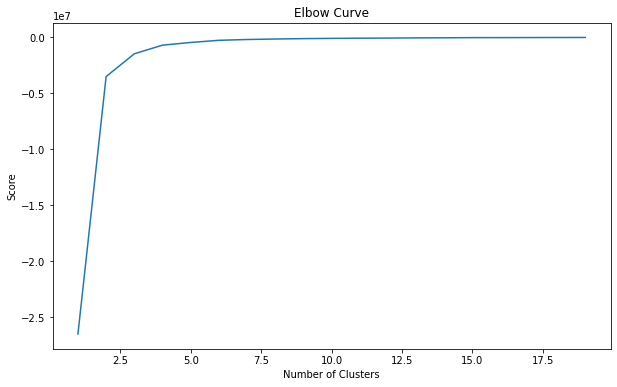

In [116]:
from sklearn.cluster import KMeans

data = NC.iloc[:,2:11]
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

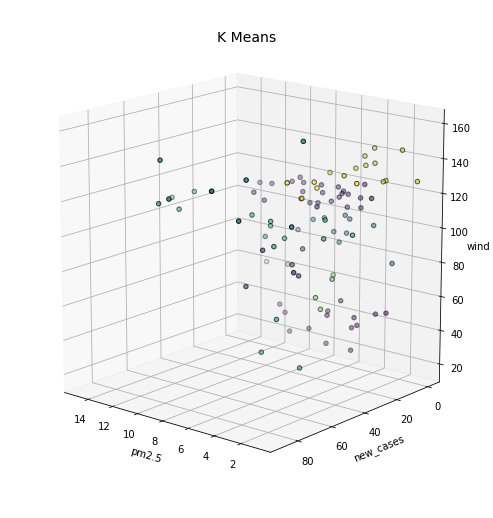

In [117]:
from mpl_toolkits.mplot3d import Axes3D

X = NC[["pm2.5","new_cases","wind"]]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=15, azim=130)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("pm2.5")
ax.set_ylabel("new_cases")
ax.set_zlabel("wind")
plt.title("K Means", fontsize=14);

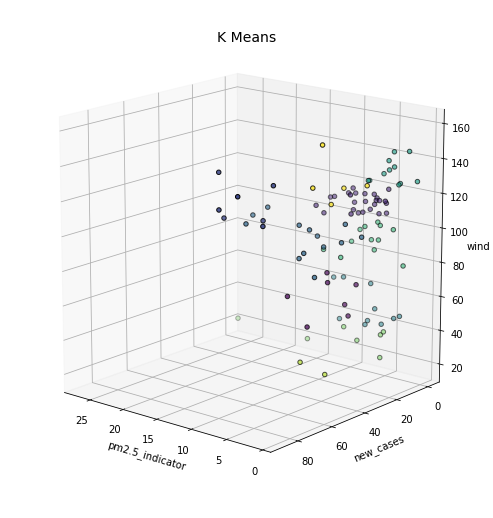

In [118]:
X = NC[["PM2.5_indicator","new_cases","wind"]]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=15, azim=130)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("pm2.5_indicator")
ax.set_ylabel("new_cases")
ax.set_zlabel("wind")
plt.title("K Means", fontsize=14);

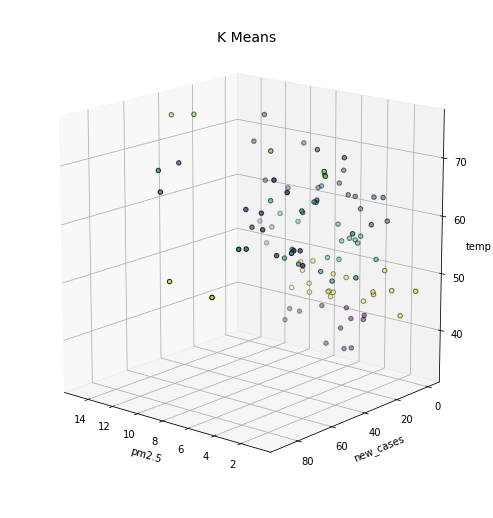

In [21]:

X = NC[["pm2.5","new_cases","temp"]]
X = X.reset_index(drop=True)
km = KMeans(n_clusters=10)
km.fit(X)
km.predict(X)
labels = km.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=15, azim=130)
ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2],
          c=labels.astype(np.float), edgecolor="k")
ax.set_xlabel("pm2.5")
ax.set_ylabel("new_cases")
ax.set_zlabel("temp")
plt.title("K Means", fontsize=14);

In [82]:
NC.iloc[:,7]

date
2020-01-22    0.0
2020-01-23    0.0
2020-01-24    0.0
2020-01-25    0.0
2020-01-26    0.0
             ... 
2020-04-26    0.0
2020-04-27    2.0
2020-04-28    0.0
2020-04-29    0.0
2020-04-30    4.0
Name: new_deaths, Length: 100, dtype: float64

# **Anomaly detection using SVM**


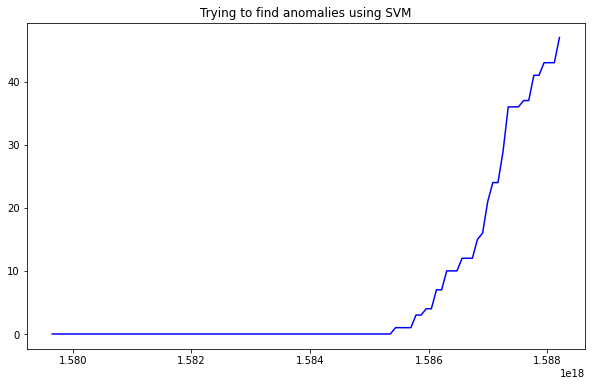

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM
data = NC.iloc[:,1:9]
NC2 = NC
NC2['date_time_int']  = NC2.index.astype(np.int64)

scaler = StandardScaler()
np_scaled = scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train oneclassSVM 
model = OneClassSVM(nu=0.01, kernel="rbf", gamma=0.01)
model.fit(data)
NC2['anomaly3'] = pd.Series(model.predict(data))

fig, ax = plt.subplots(figsize=(10,6))
a = NC2.loc[NC2['anomaly3'] == -1, ['date_time_int', 'cumulative_deaths']] #anomaly

ax.plot(NC2['date_time_int'], NC2['cumulative_deaths'], color='blue')
ax.scatter(a['date_time_int'],a['cumulative_deaths'], color='red')
plt.title("Trying to find anomalies using SVM")
plt.show();

# **Getting time lags for cumulative deaths and new deaths**

In [83]:
temps = DataFrame(NC.iloc[:,5])
dataframe = DataFrame()
for i in range(6,0,-1):
	dataframe['t-'+str(i)] = temps.shift(i).values[:,0]
dataframe['t'] = temps.values[:,0]
print(dataframe.head(7))
dataframe = dataframe[7:]
dataframe.to_csv('lags_NC.csv', index=False)

   t-6  t-5  t-4  t-3  t-2  t-1  t
0  NaN  NaN  NaN  NaN  NaN  NaN  0
1  NaN  NaN  NaN  NaN  NaN  0.0  0
2  NaN  NaN  NaN  NaN  0.0  0.0  0
3  NaN  NaN  NaN  0.0  0.0  0.0  0
4  NaN  NaN  0.0  0.0  0.0  0.0  0
5  NaN  0.0  0.0  0.0  0.0  0.0  0
6  0.0  0.0  0.0  0.0  0.0  0.0  0


In [84]:
temps = DataFrame(NC.iloc[:,7])
dataframe = DataFrame()
for i in range(6,0,-1):
	dataframe['t-'+str(i)] = temps.shift(i).values[:,0]
dataframe['t'] = temps.values[:,0]
print(dataframe.head(7))
dataframe = dataframe[7:]
dataframe.to_csv('newdeaths_lags_NC.csv', index=False)

   t-6  t-5  t-4  t-3  t-2  t-1    t
0  NaN  NaN  NaN  NaN  NaN  NaN  0.0
1  NaN  NaN  NaN  NaN  NaN  0.0  0.0
2  NaN  NaN  NaN  NaN  0.0  0.0  0.0
3  NaN  NaN  NaN  0.0  0.0  0.0  0.0
4  NaN  NaN  0.0  0.0  0.0  0.0  0.0
5  NaN  0.0  0.0  0.0  0.0  0.0  0.0
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0


# **Feature Feature Importance vs Feature Selection for Cumilative deaths lags**

[0.10014198 0.21905207 0.10941515 0.09860294 0.22176945 0.25101842]


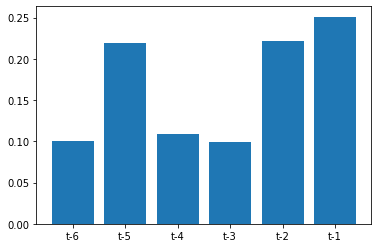

In [79]:
from sklearn.ensemble import RandomForestRegressor
# load data
dataframe = read_csv('lags_NC.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

Selected Features:
t-5
t-4
t-2
t-1


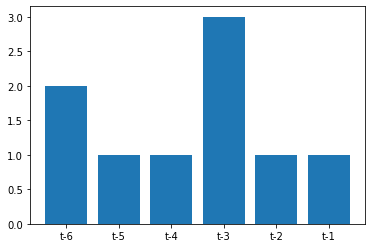

In [80]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# load dataset
dataframe = read_csv('lags_NC.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

# **Feature Importance vs Feature Selection for new deaths lags**

[0.13040547 0.18915722 0.19013991 0.17700366 0.17474273 0.13855101]


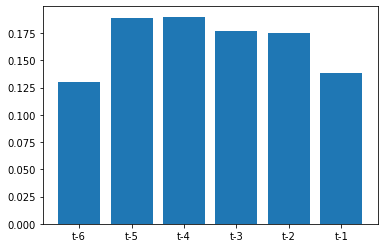

In [85]:
from sklearn.ensemble import RandomForestRegressor
# load data
dataframe = read_csv('newdeaths_lags_NC.csv', header=0)
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

Selected Features:
t-5
t-4
t-3
t-2


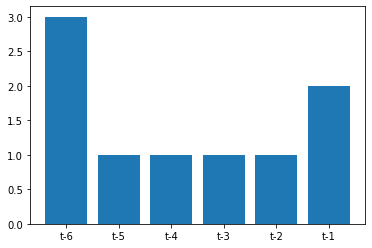

In [86]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
# load dataset
dataframe = read_csv('newdeaths_lags_NC.csv', header=0)
# separate into input and output variables
array = dataframe.values
X = array[:,0:-1]
y = array[:,-1]
# perform feature selection
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
		print(names[i])
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

In [95]:
NC["new_cases"]

date
2020-01-22     0.0
2020-01-23     0.0
2020-01-24     0.0
2020-01-25     0.0
2020-01-26     0.0
              ... 
2020-04-26    32.0
2020-04-27    10.0
2020-04-28    27.0
2020-04-29    48.0
2020-04-30    60.0
Name: new_cases, Length: 100, dtype: float64

In [100]:
NC["new_cases"]

date
2020-01-22        -inf
2020-01-23        -inf
2020-01-24        -inf
2020-01-25        -inf
2020-01-26        -inf
                ...   
2020-04-26    3.465736
2020-04-27    2.302585
2020-04-28    3.295837
2020-04-29    3.871201
2020-04-30    4.094345
Name: new_cases, Length: 100, dtype: float64

# **Running a LOG transformation on new deaths and new cases**

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


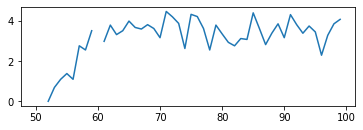

In [139]:
from numpy import log
NCTRANSFORM =NC
dataframe = DataFrame(NCTRANSFORM["new_cases"].values)
dataframe.columns = ['new_cases']
dataframe['new_cases'] = log(dataframe['new_cases'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['new_cases'])
pyplot.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


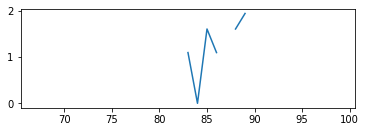

In [140]:
from numpy import log
NCTRANSFORM =NC
dataframe = DataFrame(NCTRANSFORM["new_deaths"].values)
dataframe.columns = ['new_deaths']
dataframe['new_deaths'] = log(dataframe['new_deaths'])
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['new_deaths'])
pyplot.show()